C:\Users\NAIMRI~1\AppData\Local\Temp/ipykernel_9964/3806610500.py:53: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Values"] = df['Values'].str.replace('[^\w\s]','')
C:\Users\NAIMRI~1\AppData\Local\Temp/ipykernel_9964/3806610500.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNew['Values']=dfNew['Values'].apply(lambda x: int(str(x),16)) # A pythonic trick for avoiding errors produced by reading
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Naim Rihan\anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\NAIMRI~1\AppData\Local\Temp/ipykernel_9964/3806610500.py", line 161, in clear_charts
    chart_type1

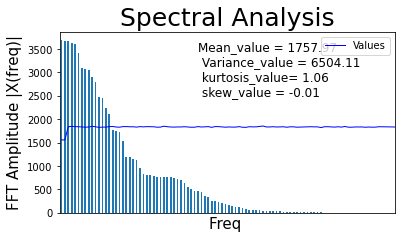

In [153]:
#Authored By @Naim Rihan | naimrihan93@gmail.com | 0096181852134 |

########################################################################################################################    
######################################  BACK END SECTION  #############################################################
########################################## Import the required libraries ################################################

import tkinter as tk
from tkinter import *
from tkinter import filedialog
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
import pandas as pd
import numpy as np
import matplotlib 
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from scipy.fftpack import fft, ifft
import os
from matplotlib.figure import Figure

# Create an instance of window # Create object
win=Tk() 

# Set the geometry of the window
win.geometry("900x500")

# Function to open a file in the system

############################################ Select txt File  #####################################################
filepath = '0'
bandwidth = 1000
def open_file():
    global filepath
    filepath = filedialog.askopenfilename(title="Open a Text File", filetypes=(("text    files","*.txt"), ("all files","*.*")))
    with open(filepath) as f:
         new_file = open("new_file.txt", "w")
         for number, line in enumerate(f.readlines()):
             # note: list index start from 0
             if number not in [0,1,2,3,4,5]:
                    new_file.write(line)   
    
         new_file.close()
    f.close()


################################################## Plotting ########################################################
        
def plot_file():
    global Color,dfNew
    global chart_type
    df = pd.read_csv("new_file.txt", sep=" ", header=None, names=["Values"]) # the hex file with subtract the unnecessary lines

    df["Values"] = df['Values'].str.replace('[^\w\s]','')
    filter = df["Values"] != ""
    dfNew = df[filter]
    dfNew['Values']=dfNew['Values'].apply(lambda x: int(str(x),16)) # A pythonic trick for avoiding errors produced by reading 
                                                                    # line by line and convert numbers to decimal form.
    x = os.path.basename(filepath)
    title = x[12:]
    title= title.replace(".txt", "")
    
    matplotlib.rcParams.update({'font.size': 10})
 
    # filtering 
    fig = dfNew.head(bandwidth).plot(color= Color, linewidth= Linewidth).get_figure()


    chart_type = FigureCanvasTkAgg(fig, win)  # To put plot in tkinter win
    chart_type.get_tk_widget().pack()

    plt.xlabel('X',fontsize=15)
    plt.ylabel('Y',fontsize=15)
    plt.title(title,fontsize=15) 
    
################################################ Statistics #######################################################

def calculates_statistics():
    
    global chart_type1
    Mean = round(dfNew["Values"].mean(),2)  #  round func returns a floating point number that is a rounded 2 dec here 
    Variance = round(dfNew["Values"].var(),2)
    ku = kurtosis(dfNew["Values"], fisher=False)
    sk = skew(dfNew["Values"], axis=0, bias=True)
    Kurtosis = round(ku,2)
    Skew = round(sk,2)

    temp = dfNew.value_counts()
    temp2 = temp.head(400)
    
    fig = temp2.plot(kind='bar').get_figure()
    
    frame = plt.gca()
    frame.axes.get_xaxis().set_ticks([]) #remove values on x 
    
    chart_type1 = FigureCanvasTkAgg(fig, win) # To put plot in tkinter win
    chart_type1.get_tk_widget().pack()

    plt.text(40,2500, 'Mean_value = %s\n Variance_value = %s \n kurtosis_value= %s \n skew_value = %s'
             % (Mean, Variance, Kurtosis, Skew) ,fontsize=12)
    
    plt.xlabel('Histogram Bins for 400 data points only',fontsize=15)
    plt.ylabel('Y',fontsize=15)
    plt.title('Some Statistics Calculations',fontsize=25)

############################################ Compute_Fourier #####################################################

def Compute_Fourier():
    
    # sampling rate
    sr = 9216
    # sampling interval
    ts = 0.000152/sr
    t = np.arange(0,0.00152,ts)

    N = len(dfNew)
    n = np.arange(N)
    T = N/sr
    freq = n/T 

    arr = dfNew["Values"].to_numpy()

    X = fft(arr)
    
    fig = Figure(figsize = (5, 5),
                 dpi = 100)
  
    # adding the subplot
    plot1 = fig.add_subplot(111)
  
    # plotting the graph
    plot1.plot(freq,np.abs(X))
  
    # creating the Tkinter canvas
    # containing the Matplotlib figure
    canvas = FigureCanvasTkAgg(fig,win)  
    canvas.draw()
  
    # placing the canvas on the Tkinter window
    canvas.get_tk_widget().pack()

    
    #chart_type2 = FigureCanvasTkAgg(fig1, win)
    #chart_type2.get_tk_widget().pack()
      
    plt.xlabel('Freq ')
    plt.ylabel('FFT Amplitude |X(freq)|')
    plt.title('Spectral Analysis',fontsize=25)
    
    
########################################################################################################################    
######################################  GUI SECTION  ##################################################################
########################################## Add buttons and scroll bars #################################################
    
# A function for close whole tkinter window
def remove_plot():
    win.destroy()
    
# A function for deleting old chart for drawing a new one   
def clear_charts():
        chart_type.get_tk_widget().pack_forget()
        chart_type1.get_tk_widget().pack_forget()
        
def func(val):
    global Color
    if val == "black":
        Color = 'black'
    elif val == "blue":
        Color = 'blue'
    elif val == "red":
        Color = 'red'
    

# Create a button to trigger the dialog
button = Button(win, text="Please Select A Text File", command=open_file)
button.pack(side=tk.TOP, anchor=NW )

#Create a button to trigger the dialog for plotting waveform
button2 = Button(win, text="Plot The Waveform", command=plot_file)
button2.pack(side=tk.TOP,anchor=NW )

#Create a button to trigger the dialog for plotting waveform
button3 = Button(win, text="Calculate Some Statistics", command=calculates_statistics)
button3.pack(side=tk.TOP, anchor=NW )

#Create a button to trigger the dialog for calculating Fourier Transform
button4 = Button(win, text="Computes The Fourier Transform", command= Compute_Fourier)
button4.pack(side=tk.TOP, anchor=NW )

#Create a button to trigger the dialog for clear the old plot
button5 = Button(win, text="Clear the chart", command= clear_charts)
button5.pack(side=tk.TOP, anchor=NW )

#Create a button to trigger the dialog for closing the window
button6 = Button(win, text="Close the app", command= remove_plot)
button6.pack(side=tk.TOP, anchor=NW )


options = ["black", "blue", "red"]

var = StringVar(win)  
Color = var.set("Please Select A Color")
w = OptionMenu(win, var, *options ,command=func)  
w["menu"].config()
w.pack(side='top',anchor=NW)  

# Scroll bar for line width
scroll=Scrollbar(win)
scroll.pack(side='left', fill='y')

# Scroll bar for bandwidth
scroll2=Scrollbar(win,orient = tk.HORIZONTAL)
scroll2.pack(side='right', fill='y')

def get(): 
    global Linewidth
    Linewidth=leftside.get('active')
 
    
def get2():
    global bandwidth 
    bandwidth=leftside2.get('active')
    

leftside = Listbox(win, width=3, height=1, yscrollcommand = scroll.set)

c = np.linspace(1,9,9) # width line values space

for i in c:
    leftside.insert('end', i)

leftside.pack(side='left',anchor=SW) 

scroll.config(command=leftside.yview, orient='vertical')

selectbutton=Button(win, text="Select Line Width", command=get)
selectbutton.pack(side='top',anchor=W,fill = "y")

################################### Filter Bandwidth from starting to particular point only #############################
# I know it should be between two values

leftside2 = Listbox(win, width=7, height=1, yscrollcommand = scroll2.set)

for j in dfNew.index:
    leftside2.insert('end', j)

leftside2.pack(side='right',anchor=SE) 

scroll2.config(command=leftside2.yview, orient='vertical')

selectbutton2=Button(win, text="Filter the bandwidth", command=get2)
selectbutton2.pack(side='top',anchor=SE,fill = "y")

############################################## Cursor #######################################################

label = Label(win)   #this code for place coor x,y in full tkinter win , but I should to make it for the fig only.
label.pack()
win.bind("<Motion>", lambda event: label.configure(text=f"{event.x}, {event.y}"))

# Execute tkinter
win.mainloop()

# Estimated actual time = 36 Hours

1- Section1: Select txt file  ( 1 hour )

-----------------------------------------

2- Section2: Displays the waveform ( 9 hours ) beacuse of alot of error especialy when convert txt file data from hex to dec.

-----------------------------------------

3- Section3: Scroll bars and dropdown menu ( 8 hours ) because of searching and make alot of experiments

-----------------------------------------

4- Section4: Statistics ( 1 hour )

------------------------------------------

5- Section5: Computes the Fourier Transform ( 11 hours ) Reviewing my previous information about signals and the Fourier 

transform and alot of searching , still need more time to make sure that everything done is right!

5- Section5: bandwidth (4 hours) I worked just for bandwidth form starting point of data to a specific point, of course the filterd signal should be between two points. maybe I can  do it later.

------------------------------------------

6- Section6: Cursor (2 hours ) I didn't find the correct way to place coor x,y for plot chart,instead I do it for whole tkinter window 

------------------------------------------

7- Section7: Many ideas come to my mind but it need time to be achieved like (Detect anomalies, trend, seasonality, forecasting

based on time series) This is in terms of dealing with signal and time series


As for the gui itself, of course many things can be added:

1- Like making a specific section completely for the buttons and control, it can be called the control panel and the other 

section is for display.

2 - It is also possible to do a live drawing of the signal, Also play with window layout and colors.


3- Thinking more about the sizes of plotted chart and axis limits


4- To use PyCharm instead of Jupyter, to use another package instead of tkinter like PyQT ( pronounced: Py Qute :D )


That's what's on my mind at the moment...


# A short descriptive report describing the steps of the development of the GUI:

Quick Outlines

1- Select txt file

2- Reading this txt file

3- Extract Data

4- Data Preparation

5- plot waveform

6- Handle line color

7- Handle line width

8- Handle Statistics 

9- Handle Scroll bars and buttons 

10- Handle buttons positions

11- Handle the sizes 

12- Fix problem of plot new chart after old one

13- Functions coordinating in jupyter cell

14- Put everything together; integration
